In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma

# Probability Theory for Thermal Physics - Lecture 1

```{admonition} Learning outcomes:
:class: outcomes
- Distinguish between **discrete** and **continuous** probability distributions.
- Define and calculate the **variance** and **standard deviation** of a distribution.
- Understand how **linear transformations** affect the mean and variance of a random variable.
- Recognise the difference between **independent** and **dependent** probabilities.

## Discrete and Continuous probability distributions

### Discrete Distributions

**Discrete random variables** can only take values from a finite or countable set. A classic example is a six-sided die, whose outcomes are {1, 2, 3, 4, 5, 6}. If we denote $x$ as a discrete random variable that takes values $x_i$ with corresponding probabilities $P_i$, we can define several useful quantities that describe its behaviour.

First, we require that the probabilities of all outcomes must add up to one:

$$
\sum_{i} P_{i} = 1.
\tag{2.1}
$$

The arithmetic mean, or expected value, is defined as:

$$
\langle x \rangle = \sum_i x_i P_i.
\tag{2.2}
$$

Intuitively, the idea is that for each outcome contributes to the sum in proportion to how likely it is to occur. This is called *weighting*. If you were to sample the random variable many times, add up all the observed values, and divide by the number of trials, the result would converge to the expected value. We may also define the "mean squared" value:

$$
\langle x^2 \rangle = \sum_i x_i^2 P_i.
\tag{2.3}
$$

Discrete distributions arise in many areas of thermal and statistical physics. Examples include:
- the amount of molecular collisions in a gas during a fixed time interval,
- the number of radioactive decay events detected by a sensor,
- the number of collision required before a molecule transfers its energy,
- the distribution of energies in systems with discrete energy levels,
- the probability of transmission or reflection when a particle encounters a barrier,
- particle velocities and energies in a simulated setting, where values are stored in bins.

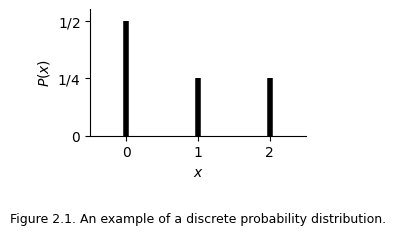

In [3]:
# Example of 3-valued discrete probability distribution.
if True:
    # Discrete values of x and corresponding probabilities
    x = np.array([0, 1, 2])
    P = np.array([1 / 2, 1 / 4, 1 / 4])

    # Create figure
    plt.figure(figsize=(3, 2))

    # Plot as vertical lines
    plt.vlines(x, 0, P, colors='k', lw=4)

    # Axis labels
    plt.xlabel(r"$x$")
    plt.ylabel(r"$P(x)$")

    # Set axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, 0.55)

    # Tick positions - relabelling y-axis tick markers.
    plt.xticks([0, 1, 2])
    plt.yticks([0, 0.25, 0.5], [r"$0$", r"$1/4$", r"$1/2$"])

    # Remove top/right spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    # Add caption
    plt.figtext(0.5, -0.6,
                "Figure 2.1. An example of a discrete probability distribution.",
                ha='center', va='top', fontsize=9, transform=plt.gca().transAxes
                )

    # comment.txt.jpg.html
    plt.tight_layout()
    plt.show()

Note that the expected value need not be present in the set of outcomes. A common example of this is the average number of children a family is expected to have across a population. These figures are often cited to occur between 1.8-2.4, yet it is only possible to have an integer number of children. These impossible values only make sense when considering a population rather than an individual sample.

```{admonition} Example: Expected value and mean squared
:class: example
Consider a scenario where random variable $x$ can take values {0, 1, 2} with corresponding probabilities {$\frac{1}{2}$, $\frac{1}{4}$, $\frac{1}{4}$}. This distribution is visualised in figure 2.1. Calculate the expected value for

- (a) the variable, $\langle x \rangle$
- (b) the mean squared of the variable, $\langle x^2 \rangle$.

## (a)

First check that $\sum P_i = 1$. Since $\frac{1}{2} + \frac{1}{4} + \frac{1}{4} = 1$ we are good to go. We then calculate the averages as follows:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 2 \cdot \tfrac{1}{4} \\\
&= \tfrac{3}{4} = 0.75
\end{align*}
$$

We see that the mean $\langle x \rangle$ is not one of the possible values $x$ can take.

## (b)

We follow a similar process for $\langle x^2 \rangle$:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0^2 \cdot \tfrac{1}{2} + 1^2 \cdot \tfrac{1}{4} + 2^2 \cdot \tfrac{1}{4} \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 4 \cdot \tfrac{1}{4} \\
&= \tfrac{5}{4} = 1.25
\end{align*}
$$
```

### Continuous distributions

Let $x$ now be a **continuous random variable**, meaning it can take any value within some range (the bounds may be finite or infinite). We must treat probabilities differently in this case. Imagine a uniform distribution between 1 and 10: one sample might give an exact value like 4, another could be something extremely specific like 3.14159265... Because there are infinitely many possible values, the probability of landing on any one exact value is effectively zero. Instead, we talk about the probability of $x$ lying within a small interval of width $dx$.

Many real-life quantities are described by continuous distributions. For example, height, commute durations, and local temperature all vary smoothly within finite limits, even if the exact value can be anything within the range. As before, the total probability must sum to one, but because we are now summing over a continuous range, we replace sums with integrals:

$$
\int P(x)dx = 1. \tag{2.4}
$$

We have analogous expressions for $\langle x \rangle$ and $\langle x^2 \rangle$:

$$
\langle x \rangle = \int x P(x)dx; \tag{2.5}
$$

$$
\langle x^2 \rangle = \int x^2 P(x)dx. \tag{2.6}
$$

Continuous random variables are extremely common in thermal physics and statistical mechanics. Typical scenarios include:
- particle speeds in a gas,
- particle energies in a classical system,
- waiting times between molecular collision events,
- spatial fields such as pressure, density and temperature,
- radiation intensity as a function of frequency.

```{admonition} Uniform Distribution on [0, 10]
:class: example

Let a continuous random variable $x$ be uniformly distributed between 0 and 10:

$$ P(x) =
\begin{cases}
    \frac{1}{10}, & 0 \le x \le 10, \\
    0, & \text{otherwise.}
\end{cases}
$$

What is the values of

- (a) the expected value $\langle x \rangle$?
- (b) the mean squared value $\langle x^2 \rangle$?


First, ensure that $P(x)$ is a valid probability distribution by checking that it is normalised:

$$
\int_0^{10} P(x) \, dx = \int_0^{10} \frac{1}{10} \, dx = \left[\frac{x}{10}\right]^{10}_{0} = 1.
$$

We can then compute the expected values:

## (a)

$$
\begin{align*}
\langle x \rangle &= \int_0^{10} x P(x) \, dx = \frac{1}{10} \int_0^{10} x \, dx = \frac{1}{10} \left[\frac{x^2}{2}\right]_0^{10} = 5, \\[6pt]
\end{align*}
$$

## (b)

$$
\begin{align*}
\langle x^2 \rangle &= \int_0^{10} x^2 P(x) \, dx = \frac{1}{10} \int_0^{10} x^2 \, dx = \frac{1}{10} \left[\frac{x^3}{3}\right]_0^{10} = \frac{100}{3} \approx 33.33.
\end{align*}
$$

The mean of 5 lies exactly halfway between the bounds, which is as you'd expected for a symmetric uniform distribution.

```{admonition} Exponential Lifetime Distribution
:class: example


Now consider a physical system whose lifetime follows an exponential distribution, such as the lifetime of a radioactive nucleus. The probability density of its lifetime is given by

$$
P(t) =
\begin{cases}
\lambda e^{-\lambda t}, & t \ge 0, \\
0, & t < 0,
\end{cases}
$$

where $\lambda$ is the decay rate constant. Calculate for this distribution:

- (a) $\langle t \rangle$
- (b) $\langle t^2 \rangle$

## (a)

First, confirm normalisation:

$$
\int_0^{\infty} P(t) \, dt = \int_0^{\infty} \lambda e^{-\lambda t} \, dt =
\lambda \left[-\frac{1}{\lambda} e^{-\lambda t}\right]^{\infty}_0 = \left[-e^{-\lambda t}\right]_0^{\infty} = 1.
$$

Then compute the averages:

$$
\begin{align*}
\langle t \rangle &= \int_0^{\infty} t P(t) \, dt = \lambda \int_0^{\infty} t e^{-\lambda t} \, dt = \frac{1}{\lambda}, \\[6pt]
\end{align*}
$$

## (b)
$$
\begin{align*}
\langle t^2 \rangle &= \int_0^{\infty} t^2 P(t) \, dt = \lambda \int_0^{\infty} t^2 e^{-\lambda t} \, dt = \frac{2}{\lambda^2}.
\end{align*}
$$

For an exponential lifetime distribution, the mean value $\langle t \rangle = 1/\lambda$ has a direct physical interpretation: it is the **average lifetime** of the system. In radioactive decay, this corresponds to the characteristic time after which only about $1/e$ of the original nuclei remain. It is closely related to experimentally measurable quantities such as the half-life.

The second moment $\langle t^2 \rangle$ tells us about the **spread of possible lifetimes**. Combining these results gives the variance, computed via the difference between $\langle t^2 \rangle$ and $\langle t \rangle$:

$$
\sigma_t^2 = \langle t^2 \rangle - \langle t \rangle^2 = \frac{1}{\lambda^2},
\tag{2.7}
$$

which means the standard deviation is equal to the mean:

$$
\sigma_t = \langle t \rangle = \frac{1}{\lambda}.
\tag{2.8}
$$

This is a distinctive property of exponential decay: the uncertainty in the lifetime is as large as the lifetime itself. Physically, this tells us that individual decay events are highly unpredictable, even though the *average behaviour* of a large population is very regular and follows an exact exponential law. This contrast between noisy individual lifetimes and smooth ensemble behaviour is one of the central ideas of statistical physics.


## Measures of Central Tendencies

When describing a probability distribution, we often want to identify simple central values which best represent the properties and sampling behaviour of a probability distribution. These are known as **measures of central tendency**, and the most common are the **mean**, **median**, and **mode**:

- **Mean** ⟨x⟩: the expectation or average value of a distribution.
- **Median**: the value that divides the distribution into two equal halves, i,e. the middle value.
- **Mode**: the most probable value, where the probability is maximal.

For symmetric distributions (like the Gaussian), these three measures coincide onto the same value. For asymmetric or skewed distributions, they differ, and thus provide valuable information for characterising a distribution. In general, thermal systems contain huge numbers of particles, so we typically describe their behaviour statistically rather than tracking each particle individually to discern collective behaviour. Measures of central tendency, the mean, median and mode, each give us simple summary values which capture the typical behaviour of a distribution. In the context of thermal physics, these quantities help us understand average energies, particle speeds, and the way these fluctuations cluster around specific values. They can also be useful in that they help us distinguish when system exhibit symmetric behaviour, as is the case when all three measures are in agreement, i.e. $\text{mean} = \text{median} = \text{mode}$, or when they exhibit strong asymmetry.

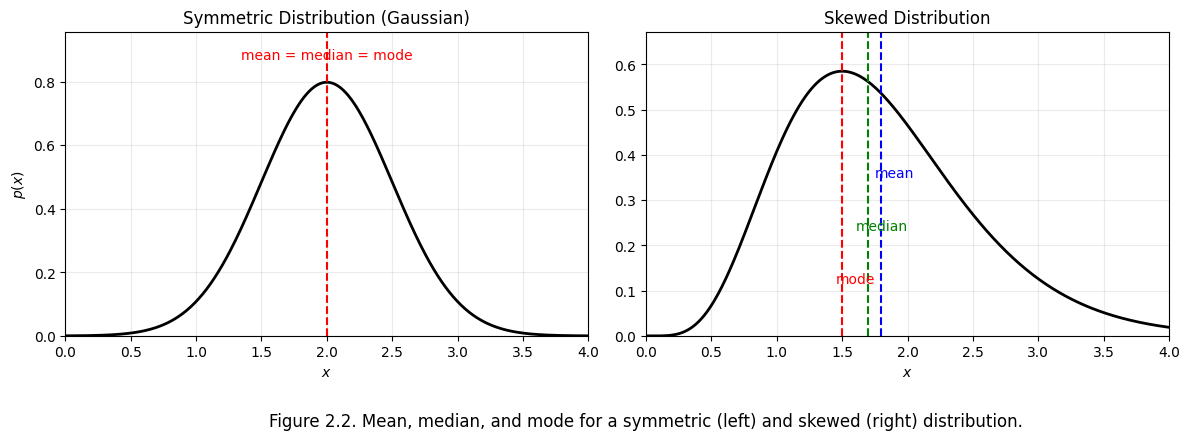

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# =========================================
# LEFT PANEL — SYMMETRIC GAUSSIAN
# =========================================

x = np.linspace(0, 4, 400)
mu, sigma = 2, 0.5
y = norm.pdf(x, mu, sigma)

axs[0].plot(x, y, color='k', linewidth=2)

axs[0].axvline(mu, color='r', linestyle='--', linewidth=1.5)

# Place text slightly above the curve — ~10% above curve maximum
axs[0].text(mu, max(y) * 1.08,
            "mean = median = mode",
            color='r',
            ha='center', va='bottom')

axs[0].set_xlim(0, 4)
axs[0].set_ylim(0, max(y) * 1.2)
axs[0].set_title("Symmetric Distribution (Gaussian)")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$p(x)$")
axs[0].grid(alpha=0.25)

# =========================================
# RIGHT PANEL — SKEWED (GAMMA)
# =========================================

shape = 6
scale = 0.3
x2 = np.linspace(0, 4, 400)
y2 = gamma.pdf(x2, a=shape, scale=scale)

mode = (shape - 1) * scale
mean = shape * scale
median = gamma.median(shape, scale=scale)

axs[1].plot(x2, y2, color='k', linewidth=2)

axs[1].axvline(mode, color='r', linestyle='--', linewidth=1.5)
axs[1].axvline(median, color='g', linestyle='--', linewidth=1.5)
axs[1].axvline(mean, color='b', linestyle='--', linewidth=1.5)

axs[1].text(mode + 0.1, max(y2) * 0.2, "mode", color='r', ha='center')
axs[1].text(median + 0.1, max(y2) * 0.4, "median", color='g', ha='center')
axs[1].text(mean + 0.1, max(y2) * 0.6, "mean", color='b', ha='center')

axs[1].set_xlim(0, 4)
axs[1].set_ylim(0, max(y2) * 1.15)
axs[1].set_title("Skewed Distribution")
axs[1].set_xlabel("$x$")
axs[1].grid(alpha=0.25)

plt.figtext(0.0, -0.25,
            "Figure 2.2. Mean, median, and mode for a symmetric (left) and skewed (right) distribution.",
            ha='center', va='top', fontsize=12, transform=plt.gca().transAxes
            )

plt.tight_layout()
plt.show()

While many distributions in thermodynamics are symmetric, like the Gaussian and Binomial distributions commonplace throughout physics, real physical scenarios can often produce assymetrically distributed systems. For example, particle speeds in a gas, or waiting times between detection events are typically not symmetrically distributed. The skewed plot highlights how the mean, median and mode can differ significantly, and illustrates why we cannot rely on just one of these measures when interpretic assymetrically distributed data. In skewed distributions, the mean is pulled towards the distribution's tail, whilst the median moves between the mean and mode. Regardless, the mode still represents the most probable value, i.e. it is situated at the peak of the distribution.

### Expectations of a function

As we learned in the section on discrete and continuous distributions, the expectation value computes the arithmetic mean of a distribution $P(x)$, with respect to an arbitrary function, $f(x)$, which may simply be the variable itself, i.e. $x$:

$$
\langle f(X) \rangle =
\begin{cases}
\displaystyle \sum_i f(x_i)P(x_i), & \text{discrete}\\[6pt]
\displaystyle \int_{-\infty}^{\infty} f(x)p(x)\,dx, & \text{continuous}
\end{cases}
$$

Notably, the expected value of a constant is merely itself. Since it's probability of occurance is 1. For a given constant $A$:

$$
\begin{align}
A
&= \sum_i A_i \cdot P(A_i) \\
&= A \cdot P(A) \\
&= A \cdot 1 \\
&= A
\end{align}
$$


### Variance

The **variance** measures the average deviation of values around the mean of a distribution and is always positive. It is defined as follows:

$$
\mathrm{Var}(X) = \langle (x-⟨x⟩)^2 \rangle
\tag{2.9}
$$

We can expand the above expression to derive a simpler expression for calculating the variance of a scalar variable:

$$
\begin{align}
\mathrm{Var}(x)
&= \langle (x - ⟨x⟩)^2 \rangle
\\
&= \langle x^2 - 2⟨x⟩x + ⟨x⟩^2 \rangle
\\
&= \langle x^2 \rangle - 2⟨x⟩⟨x⟩ + ⟨x⟩^2
\\
&= \langle x^2 \rangle - ⟨x⟩^2.
\tag{2.10}
\end{align}
$$

This manner of expressing the variance gives rise to a mnemonic expression with which you can memorise the formula: The variance is "the mean of the squares minus the square of the means." The variance for a variable $x$ is often denoted $\sigma^2_x$, and relates to the **standard deviation**, which is simply the square root of the variance:

$$
\sigma_x = \sqrt{\left\langle (x - \langle x \rangle)^2 \right\rangle}
= \sqrt{\,\langle x^2 \rangle - \langle x \rangle^2\,}
\tag{2.11}
$$

## Linear Transformations

A linear transformation is a mathematical rule which maps one variable to another through scaling and shifting. The general form is $y = ax + b$. The constant $a$ controls how much the values are stretched $(a > 1)$ or compressed $(a < 1)$, and $b$ controls how much they are shifted up $(b > 1)$ or down $(b < 1)$. Many everyday unit conversions, such as inches to centimeters or Celcius to Kelvin, are examples of linear transformation.

```{admonition} Example: Inches to centimetres
:class: example

The conversion from inches to centimetres, or vice versa, is a linear transformation. If we take $x$ to be inches, then to find the value $y$ centimetres, we simply use the scale factor of $a=2.54$ inches per centimeter and an intercept $b=0$:

$$
y\ \text{in} = x\ \text{cm} \times a + b = 2.54\ x\ \text{in} + 0
$$

```

<!-- stef: probably don't need 3 examples for linear transformations do we? plus these are covered in the next section
- Converting **Celsius to Kelvin**: $T_K = T_C + 273.15$ → shift only ($a = 1$, $b = 273.15$).
- Converting **Celcius to Fareneheit**: $T_F = (T_C \times 1.8) + 32$ → scale and shift ($a = 1.8$, $b = 32$). -->

### Expectation under a linear transformation

Because the expectation operator $\langle \cdot \rangle$ is linear, the mean of a transformed variable follows the transformation directly. Scaling random variable $x$ by $a$ and shifting by $b$ means the average value is also scaled by $a$ and shifted by $b$:

$$
\langle y \rangle = \langle ax \ + \ b \rangle = a \langle x \rangle \ + \ b
\tag{2.12}
$$

A constant (i.e. $b$) merely contributes its own value to the expectation, and constant factors (i.e. $a$) simply pass through the expectation operator. The full process of calculating $\langle y \rangle$ following its production through the linear transformation $y = ax+b$ is as follows:

$$
\begin{aligned}
\langle y \rangle
&= \langle a x + b \rangle \\[6pt]
&= \langle a x \rangle + \langle b \rangle \\[6pt]
&= \langle a \rangle\,\langle x \rangle + \langle b \rangle \\[6pt]
&= a\,\langle x \rangle + b
\end{aligned}
$$

### Variance under a linear transformation

Variance behaves slightly differently. Shifting by $b$ has no effect, because moving a distribution left or right does not change its spread. Scaling by $a$ however does stretch/compress the distribution, manifesting as a squared scaling of the variance. For a variable $x$ transformed linearly via $y = a x + b$:

Starting with the standard definition of the variance:

$$
\mathrm{Var}(y) = \langle (y - \langle y \rangle)^2 \rangle
$$

and substituting $y = a x + b$,

$$
\begin{align}
\mathrm{Var}(y)
&= \left\langle (ax + b - \langle ax + b \rangle)^2 \right\rangle \\[4pt]
&= \left\langle (ax + b - (a\langle x \rangle + b))^2 \right\rangle \\[4pt]
&= \left\langle (a(x - \langle x \rangle))^2 \right\rangle \\[4pt]
&= a^2\,\left\langle (x - \langle x \rangle)^2 \right\rangle \\[4pt]
&= a^2\,\mathrm{Var}(x)
\tag{2.13}
\end{align}
$$

This is an important result for physics and measurement generally, as whenever a quantity is converted or calibrated using a linear relation, its uncertainty scales by the square of that factor.

In [ ]:
# Data
np.random.seed(0)
x = np.random.normal(0, 1, 100000)

# Linear transform params
a = 1.8
b = 2.0
y = a * x + b

# Means/variances
mean_x, var_x = np.mean(x), np.var(x)
mean_y, var_y = np.mean(y), np.var(y)

fig, ax = plt.subplots(figsize=(10, 5))

# -------------------------
# Original distribution
# -------------------------
ax.hist(
    x, bins=100,
    density=True,
    alpha=0.6,
    color='tab:blue',
    edgecolor='black',
    label=f"Original x\nmean = {mean_x:.2f}, var = {var_x:.2f}"
)
ax.axvline(mean_x, color='tab:blue', linestyle='--', linewidth=1.5)

# -------------------------
# Transformed distribution
# -------------------------
ax.hist(
    y, bins=100,
    density=True,
    alpha=0.6,
    color='tab:red',
    edgecolor='black',
    label=f"Transformed y = ax + b\nmean = {mean_y:.2f}, var = {var_y:.2f}"
)
ax.axvline(mean_y, color='tab:red', linestyle='--', linewidth=1.5)

# Labels
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.set_title("Effect of the Linear Transformation y = ax + b")
ax.legend(frameon=False)
ax.grid(alpha=0.25)

# -------------------------
# Caption
# -------------------------
plt.figtext(
    0.5, -0.05,
    f"Linear transformation applied: y = {a}x + {b}.  "
    "The shift (b) moves the distribution horizontally, "
    "while the scaling (a) stretches it, increasing the variance by a².",
    ha='center'
)

plt.tight_layout()
plt.show()

## Independent Variables in Probability

In many physical problems we work with more than one random variable. For example, a molecule has both a position and a velocity, and repeated measurements of the same quantity each produce different outcomes. Sometimes these variables are **independent**, meaning that knowing the value of one does not provide any information about the other. A simple example is coin tossing: knowing the result of one flip does not influence the next.

Formally, two random variables $u$ and $v$ are *independent* if their joint probability distribution factorises into a product series of each variable's marginal distribution:

$$
P(u, v) = P_u(u)\,P_v(v).
$$

If this holds, the value observed for $u$ has no bearing on $v$, and vice versa. This generalises to any number of independent variables. If $\vec{x} = (x_1, x_2, \ldots, x_N)$ has each component independent of the other, then

$$
P(\vec{x}) = \prod_{i=1}^{N} P_i(x_i).
\tag{2.14}
$$


A very useful consequence of independence is that the expectation of a product factorises:

$$
\begin{aligned}
\langle uv \rangle
  &= \int\!\!\int uv\,P_u(u)\,P_v(v)\,du\,dv \\[6pt]
  &= \left( \int u\,P_u(u)\,du \right)
     \left( \int v\,P_v(v)\,dv \right) \\[6pt]
  &= \langle u \rangle \,\langle v \rangle.
\end{aligned}
$$

The same reasoning extends directly to $N$ independent variables:

$$
\begin{aligned}
\left\langle \prod_{i=1}^N X_i \right\rangle
  &= \int \cdots \int
     \left( \prod_{i=1}^N x_i \right)
     \left( \prod_{i=1}^N p_i(x_i) \right)
     dx_1\cdots dx_N \\[6pt]
  &= \prod_{i=1}^N \left( \int x_i\, p_i(x_i)\,dx_i \right) \\[6pt]
  &= \prod_{i=1}^N \langle X_i \rangle.
\end{aligned}
\tag{2.15}
$$

This result holds for discrete variables as well: simply replace the integrals within the series with sums.

```{admonition} Example: Mean and variance
:class: example

Suppose that there are $n$ independent variables, $X_i$, each with the same mean $\langle X \rangle$ and variance $\sigma^2_X$. Let $Y$ be the sum of the random variables, such that $Y = X_1 + X_2 \ + \ ... \ + \ X_n$. Find

- (a) the mean of Y
- (b) the variance of Y

## (a)

The mean of $Y$ is simply the sum of each variable's expectation value. As each variable $X_i$ has the same mean $\langle X \rangle$, we have:

$$
\langle Y \rangle = n \langle X \rangle.
$$

## (b)

Finding the variance of $Y$ is a marginally more complicated matter. To start, let's refer to the formula $\sigma^2_Y = \langle Y^2 \rangle - \langle Y \rangle^2$. Seeing as we have $\langle Y \rangle^2 = n^2 \langle X \rangle^2$, we only need to calculate $\langle Y^2 \rangle$:

$$
\begin{align}
\langle Y^{2} \rangle
  &= \langle X_{1}^{2} + \cdots + X_{N}^{2} + X_{1}X_{2} + X_{2}X_{1}
     + X_{1}X_{3} + \cdots \rangle \tag{3.37} \\[6pt]
  &= \langle X_{1}^{2} \rangle + \cdots + \langle X_{N}^{2} \rangle
     + \langle X_{1}X_{2} \rangle + \langle X_{2}X_{1} \rangle
     + \langle X_{1}X_{3} \rangle + \cdots
\end{align}
$$

There are $n$ terms like $\langle X_1^2 \rangle$ on the right-hand side, and n(n-1) terms like $\langle X_1 X_2 \rangle$. The former takes the value $\langle X^2 \rangle$ and the latter $\langle X \rangle \langle X \rangle = \langle X \rangle^2$. Therefore:

$$
\langle Y^{2} \rangle = n\langle X^2 \rangle + n(n-1)\langle X \rangle^2,
$$

and,

$$
\begin{align}
\sigma_y^2
  &= \langle Y^2 \rangle - \langle Y \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n(n-1)\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n^2\langle X \rangle^2 - n\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle - n\langle X \rangle^2 \\[6pt]
  &= n\!\left(\langle X^2 \rangle - \langle X \rangle^2\right) \\[6pt]
  &= n\sigma_X^2
\end{align}
$$

This tells us that if we make $n$ independent measurements of the same quantity, and then take their average via $Y/n$, the uncertainty in that average is reduced by a factor $\sqrt{n}$ compared to a single measurement:

$$
\sigma_{mean} = \frac{\sigma_x}{n}.
$$


This principle - that averaging many independent measurements reduces error due to randomness - is central to experimental physics. A useful analogy comes from random walks and Brownian motion. In Brownian motion, larger particles suspended in a fluid are constantly buffeted by countless, tiny molecular collisions. Each step is unpredictable and, because the impacts are uncorrelated and occur from all sides, the average displacement is zero. Yet the root-mean-square displacement still grows as $\sqrt{n}$, and thus an overall trajectory over time appears.

The same logic applies to measurement. When fluctuations are truly independent, random error is suppressed by averaging; but any systematic push, whether due to a biased instrument or a drift analogous to a directional force in a random walk, accumulates with repeated measurements rather than diminishes. This distinction between random and biased error explains why averaging reduces noise but cannot eliminate systematic error.

## Further Examples

### The Birthday Problem

In a group of *N* people, what is the probability that at least two of them share the same birthday?
We denote this probability as $P(\text{match})$. The complementary probability — that **no one** shares a birthday — is $P(\text{no match})$, and clearly:

$$
P(\text{match}) = 1 - P(\text{no match}).
$$

It’s usually easier to calculate the complementary case first.

In the standard formulation of the birthday problem, we assume that birthdays are **independent** and **uniformly distributed** across the 365 days of the year, and that there are no instances of sampling bias, and that leap years aren't a thing...
In reality, this is only an approximation: real birth data show mild seasonal variation and weak correlations (for instance, between siblings).
However, these deviations are small enough that they do not meaningfully change the overall result.

If there are *N* people in the group and no one shares a birthday:

- The first person can have any of 365 birthdays.
- The second must have a different one - 364 options.
- The third must avoid the first two - 363 options.
- And so on...

Therefore, we have:

$$
P(\text{no match}) =
\frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365} \times \dots \times \frac{365 - N + 1}{365},
$$

which we can express compactly using factorials as:

$$
\begin{align}
P(\text{no match})
&= \frac{365 \times 364 \times 363 \times \dots \times (365 - N + 1)}{365^N} \\
&= \frac{365!}{(365 - N)! \, 365^N}.
\end{align}
$$

Finally, the probability that **at least one** shared birthday occurs in the group is:

$$
P(\text{match}) = 1 - \frac{365!}{(365 - N)! \, 365^N}.
$$

Let's now graph this probability as a function of *N* to see how quickly it rises.


<function matplotlib.pyplot.show(close=None, block=None)>

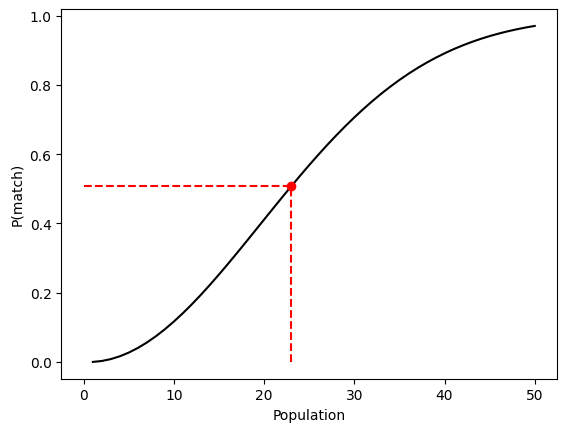

In [5]:
import math
from math import factorial as fac
import matplotlib.pyplot as plt

# Birthday problem figure.

fig = plt.Figure(figsize=(5, 5))


def shared_birthday_probability(num_people: int) -> float:
    numerator = math.factorial(365)
    denominator = fac(365 - num_people) * 365 ** num_people
    return 1 - numerator / denominator


population = range(1, 51)

plt.plot(population,
         list(map(shared_birthday_probability, population)),
         color='k')
plt.plot(23, shared_birthday_probability(23),
         color='r', markersize=6, marker='o')
plt.hlines(y=[shared_birthday_probability(23)], xmin=0, xmax=23, linestyle='--', color='r')
plt.vlines(x=[23], ymin=0, ymax=0.5, linestyle='--', color='r')
plt.xlabel("Population")
plt.ylabel("P(match)")

plt.show

### Picking balls out of a bag

The game is rather simple. You are presented a bag which contains 5 balls, three of which green, the two remaining are red. You are to extract two balls from the bag successively, and if both are green you win. Notably, the ball acquired after the first round is not replaced, reducing the number of balls to 4. The entry fee for the game is £0.35 and if you win you receive £1. Is it economical to play?

We can frame this problem relatively simply with a decision tree:


<img src="../../src/figures/Selecting_Green_Balls.png" width="600px">

On the first pick, you have a probability 3/5 of selecting a green ball, as there are 5 possible balls to select and 3 of which are green. On your second pick, the population size has decreased by 1, and hence the probability of a subsequent success is 2/4.

$$
\begin{align}
P(\text{success}) &= P(\text{1st green and 2nd green}) = P(\text{1st green}) \times P(\text{2nd green} \mid \text{1st green}) \\
&= \frac{3}{5} \times \frac{2}{4} = \frac{3}{10} = 30 \%
\end{align}
$$

With the probability of winning being 30%, we can calculate the expected earnings on average:

$$
\langle \text{reward} \rangle = 0.3 \cdot £1 + 0.7 \cdot £0 = £0.3.
$$

So on average, the game master wins £0.05 every time we play

### Determining dependence between two events.

You have two fair dice (d6s). Event A is that at least one of the die lands with 6 facing upward, and event B is that the total of both dice is greater than 6. determine whether events A and B are independent.

You can do so by checking whether $P(A) = P(A \mid B)$. The easiest way to determine this is by illustrating all the possible outcomes, then grouping them by the event they fall into:

<img src="../../src/figures/DiceRolls_DependentEvents.png" width="600px">

Since $P(A) = \tfrac{11}{36}$ and $P(A \mid B) = \tfrac{11}{21}$ the events are clearly dependent on one another.

## Finding a Particular Pokemon

You find yourself in the Sinnoh region, scouring for a particular Pokémon. You tell your accompanying friend that the probability of finding the Pokémon you seek per searching instance is $\frac{1}{n}$, to which they reply that, on average, you need only search $n$ times to find your quarry. Intuitively that sounds sensible, but is it true?

What is the probability of success based on her logic? The probability of finding the Pokémon on your first try is:

$$
P(\text{Pokémon}) = \frac{1}{n},
$$

so naturally the probability of not finding the Pokémon on the first attempt is:

$$
P(\text{No Pokémon}) = 1 - \frac{1}{n}.
$$

We presume to think that each searching instance is independent. Your previous efforts have no bearing on future success. Henceforth, the probability of failing to find the right Pokémon after $n$ attempts is:

$$
P(\text{No Pokémon after } n \text{ tries}) = \left(1 - \frac{1}{n}\right)^n,
$$

meaning the probability of success by the $n^{th}$ attempt is merely 1 minus this probability:

$$
P(\text{Pokémon after } n \text{ tries}) = 1 - \left(1 - \frac{1}{n}\right)^n.
$$

Let's now graph this probability equation as a function of *n*...

In [ ]:
plt.Figure(figsize=(7, 5))

trials = range(1, 16)


def prob_success_n_trials(n: int):
    p_fail = 1 - (1 / n)
    return 1 - p_fail ** n


plt.plot(trials,
         list(map(prob_success_n_trials, trials)),
         linestyle='',
         marker='o',
         markersize=5,
         color='k')

plt.xlabel("Number of Searching Instances")
plt.ylabel("Probability of Success")

As $n$ gets larger, the probability of finding the Pokémon you're after steadily converges to a constant value of ~0.632. So to be certain you'll find your Pokémon you'll need to search more than *n* times. Although graphing it helps with intuition, we can discern a more accurate result by taking the limit of the probability function with respect to $n$:

$$
\lim_{n \to \infty} \left(1 - \left(1 - \frac{1}{n}\right)^n\right) = 1 - \frac{1}{e} = 0.632...
$$

This is the consequence of a special case where we have a probability of success as being one over the number of trials. We don't see this same convergence when the number of trials doesn't match the denominator. Let us consider flipping a coin 10 times, and managing to land 10 heads in a row. The probability of this happening is:

$$
P(\text{10 in a row}) = \frac{1}{2^{10}}= \frac{1}{1024}.
$$

So what is the probability of getting 10 in a row after 1024 tries? Bearing in mind that each trial is 10 coin flips...

$$
P(\text{10 in a row after 1024 tries}) = 1 - \left(1 - \frac{1}{1024}\right)^{1024} = 0.632 = 63.2\%,
$$

and if we were to try two thousand times?

$$
P(\text{10 in a row after 2000 tries}) = 1 - \left(1 - \frac{1}{1024}\right)^{2000} = 0.858 = 85.8\%.
$$

In summary, when the probability of success for an individual trial is $\frac{1}{n}$, the probability of success after $m$ tries is:

$$
P(\text{success after m tries}) = 1 - \left(1 - \frac{1}{n}\right)^m.
$$